In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/heart[1].csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [ ]:
df.shape

(918, 12)

In [ ]:
df.isnull().values.any()

False

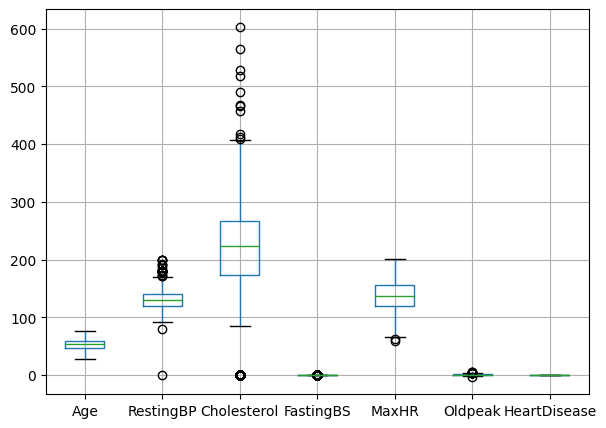

In [ ]:
df.boxplot(figsize=(7,5));

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     12    1              1         41          147          0           1   
1     21    0              2         55           40          0           1   
2      9    1              1         31          141          0           2   
3     20    0              0         39           72          0           1   
4     26    1              2         49           53          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   17    1              3         14          122          0           1   
914   40    1              0         45           51          1           1   
915   29    1              0         31            9          0           1   
916   29    0              1         31           94          0           0   
917   10    1              2         39           35          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0       98               0       10         2             0  
1       82               0       20         1             1  
2       25               0       10         2             0  
3       34               1       25         1             1  
4       48               0       10         2             0  
..     ...             ...      ...       ...           ...  
913     58               0       22         1             1  
914     67               0       42         1             1  
915     41               1       22         1             1  
916    100               0       10         1             1  
917     99               0       10         2             0  

[918 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


In [ ]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

**SCALING**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.87246276,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.12037326, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.87246276,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.31894046, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.87246276, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.87246276,  1.05211381]])

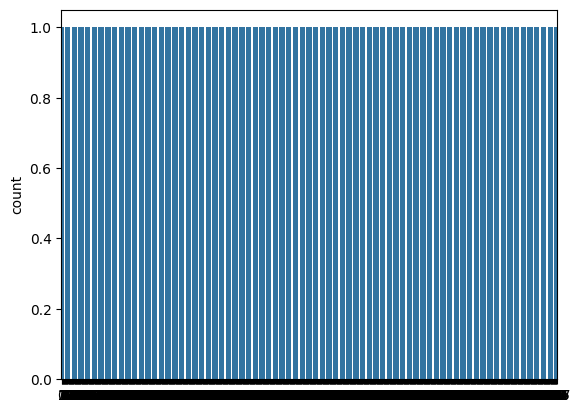

In [ ]:
sns.countplot(df['HeartDisease']);

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)

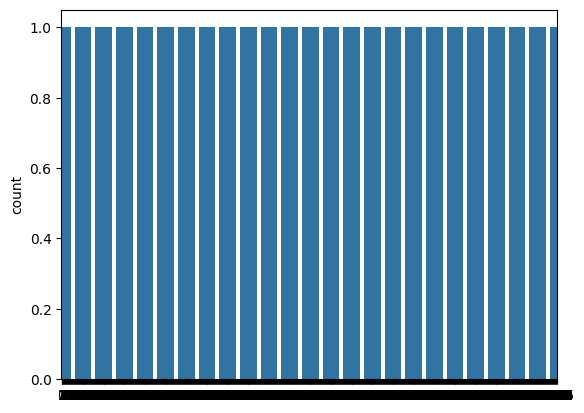

In [ ]:
sns.countplot(y_resampled);

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_logreg =logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy:', accuracy_score(y_test,y_pred_logreg))
print('Precision:',precision_score(y_test,y_pred_logreg))
print('Recall:',recall_score(y_test,y_pred_logreg))
print('f1 score:',f1_score(y_test,y_pred_logreg))

Accuracy: 0.8623188405797102
Precision: 0.910828025477707
Recall: 0.8562874251497006
f1 score: 0.882716049382716


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=53,metric='manhattan')
knn.fit(X_train,y_train)
y_pred_knn =knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_knn))
print('Accuracy:', accuracy_score(y_test,y_pred_knn))
print('Precision:',precision_score(y_test,y_pred_knn))
print('Recall:',recall_score(y_test,y_pred_knn))
print('f1 score:',f1_score(y_test,y_pred_knn))

[[ 92  17]
 [ 32 135]]
Accuracy: 0.822463768115942
Precision: 0.8881578947368421
Recall: 0.8083832335329342
f1 score: 0.8463949843260188


**DECISION TREE(GINI)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier #gini index
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
y_pred_dt1 =d_tree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dt1))
print('Accuracy:', accuracy_score(y_test,y_pred_dt1))
print('Precision:',precision_score(y_test,y_pred_dt1))
print('Recall:',recall_score(y_test,y_pred_dt1))
print('f1 score:',f1_score(y_test,y_pred_dt1))

[[ 91  18]
 [ 45 122]]
Accuracy: 0.7717391304347826
Precision: 0.8714285714285714
Recall: 0.7305389221556886
f1 score: 0.7947882736156352


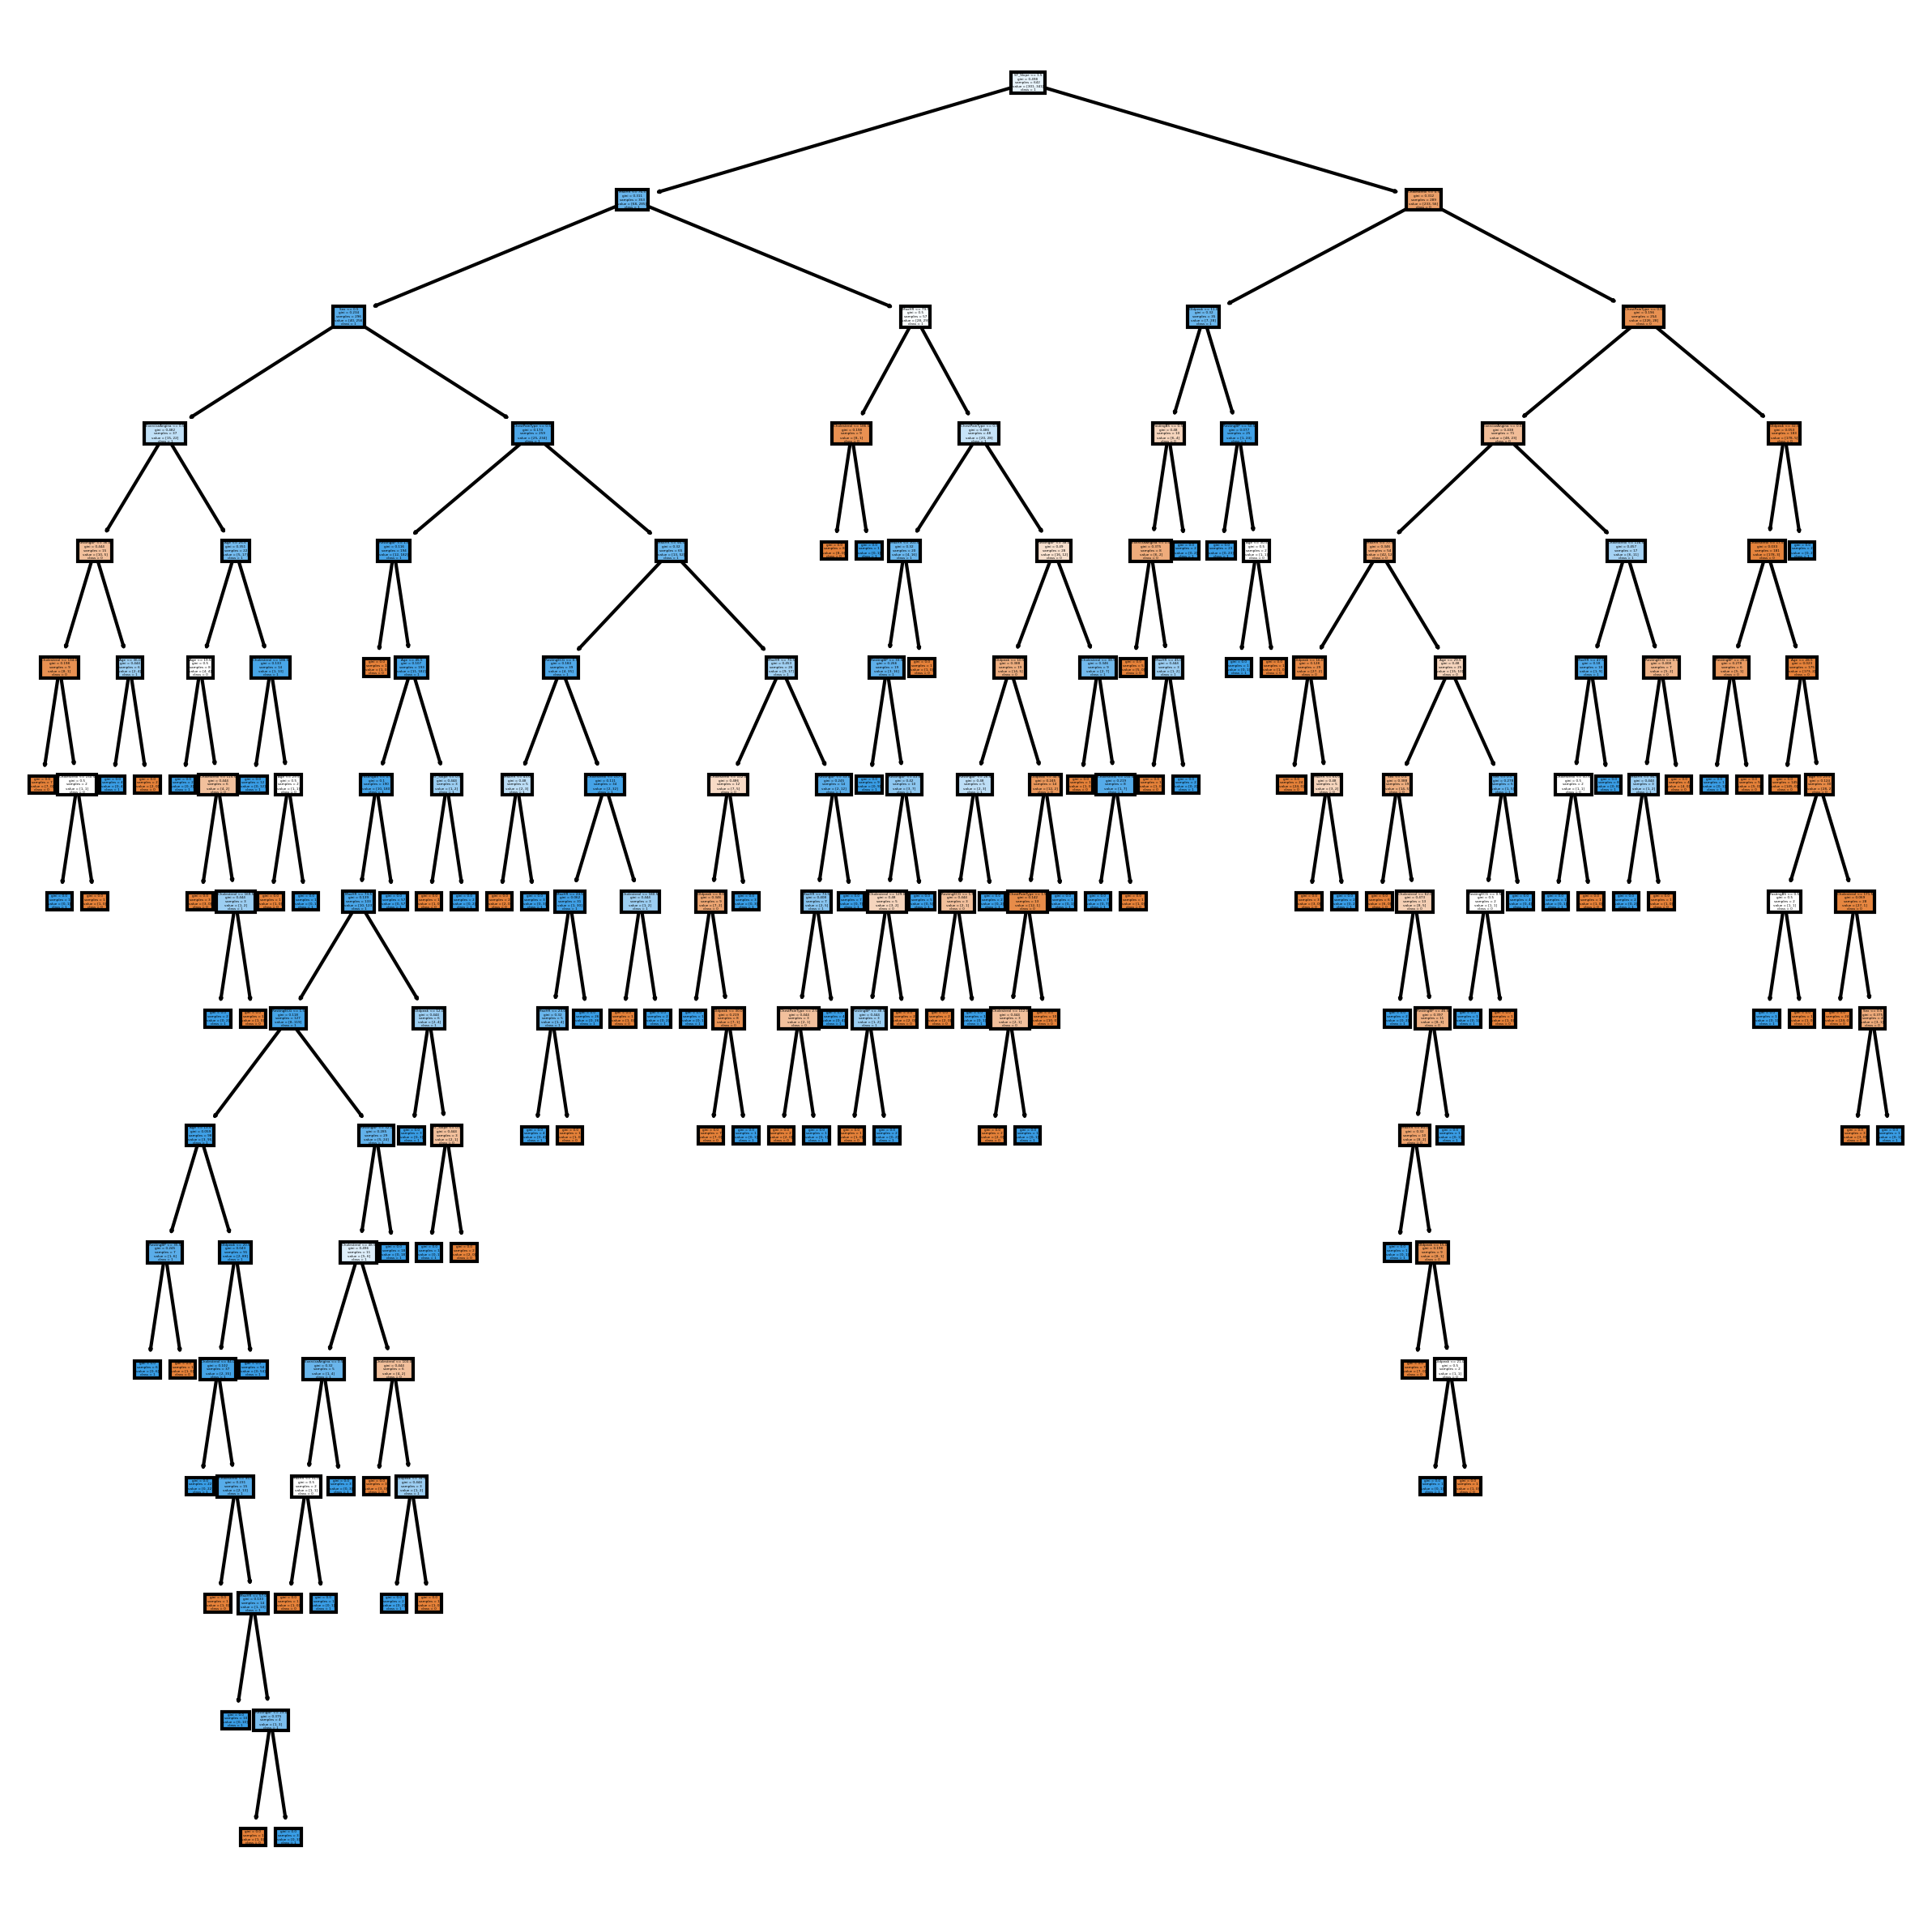

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fn =list(X_train)
cn= ['0','1']
plt.figure(figsize=(10,10),dpi=300)
plot_tree(d_tree,feature_names=fn,class_names=cn,filled=True);

**DECISION TREE(ENTROPY)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(criterion ='entropy')
d_tree.fit(X_train,y_train)
y_pred_dt =d_tree.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred_dt))
print('Accuracy:', accuracy_score(y_test,y_pred_dt))
print('Precision:',precision_score(y_test,y_pred_dt))
print('Recall:',recall_score(y_test,y_pred_dt))
print('f1 score:',f1_score(y_test,y_pred_dt))

[[ 95  14]
 [ 43 124]]
Accuracy: 0.7934782608695652
Precision: 0.8985507246376812
Recall: 0.7425149700598802
f1 score: 0.8131147540983606


**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear',C=0.15)
clf.fit(X_train,y_train)
y_pred_svm =clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Accuracy:', accuracy_score(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

Accuracy: 0.8695652173913043
[[ 96  13]
 [ 23 144]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=18)
rf_classifier.fit(X_train,y_train)
y_pred_rf =clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print( accuracy_score(y_test,y_pred_rf))
print( precision_score(y_test,y_pred_rf))
print( recall_score(y_test,y_pred_rf))
print(f1_score(y_test,y_pred_rf))

[[ 96  13]
 [ 23 144]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       109
           1       0.92      0.86      0.89       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

0.8695652173913043
0.9171974522292994
0.8622754491017964
0.888888888888889


**GRADIENT BOOST**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_booster = GradientBoostingClassifier(learning_rate=0.02)
gradient_booster.fit(X_train,y_train)
y_pred_gradboost =gradient_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print(confusion_matrix(y_test,y_pred_gradboost))
print(classification_report(y_test,y_pred_gradboost))
print( accuracy_score(y_test,y_pred_gradboost))
print( precision_score(y_test,y_pred_gradboost))
print( recall_score(y_test,y_pred_gradboost))
print(f1_score(y_test,y_pred_gradboost))

[[ 95  14]
 [ 15 152]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       109
           1       0.92      0.91      0.91       167

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276

0.894927536231884
0.9156626506024096
0.9101796407185628
0.9129129129129129


**ADA BOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_booster = AdaBoostClassifier()
ada_booster.fit(X_train,y_train)
y_pred_adaboost =ada_booster.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print( accuracy_score(y_test,y_pred_adaboost))
print(f1_score(y_test,y_pred_adaboost))
print(confusion_matrix(y_test,y_pred_adaboost))
print(classification_report(y_test,y_pred_adaboost))

0.8586956521739131
0.8785046728971964
[[ 96  13]
 [ 26 141]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       109
           1       0.92      0.84      0.88       167

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276



**XG BOOST**

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model =XGBClassifier(learning_rate=0.2)
model.fit(X_train,y_train)
y_pred_xgb =model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print( accuracy_score(y_test,y_pred_xgb))
print(f1_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))


0.8731884057971014
0.8923076923076922
[[ 96  13]
 [ 22 145]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       109
           1       0.92      0.87      0.89       167

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



**CAT BOOST**

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
model1 =CatBoostClassifier(learning_rate=0.5)
model1.fit(X_train,y_train)
y_pred_cat =model1.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print( accuracy_score(y_test,y_pred_cat))
print(confusion_matrix(y_test,y_pred_cat))
print(classification_report(y_test,y_pred_cat))
print(f1_score(y_test,y_pred_cat))

0:	learn: 0.4001562	total: 49.4ms	remaining: 49.3s
1:	learn: 0.3230702	total: 50.7ms	remaining: 25.3s
2:	learn: 0.3049626	total: 51.9ms	remaining: 17.3s
3:	learn: 0.2759934	total: 53.2ms	remaining: 13.2s
4:	learn: 0.2611250	total: 54.8ms	remaining: 10.9s
5:	learn: 0.2430233	total: 55.9ms	remaining: 9.26s
6:	learn: 0.2226565	total: 57.1ms	remaining: 8.09s
7:	learn: 0.2218791	total: 57.8ms	remaining: 7.16s
8:	learn: 0.2029075	total: 59.4ms	remaining: 6.54s
9:	learn: 0.1878358	total: 61ms	remaining: 6.04s
10:	learn: 0.1818110	total: 64.3ms	remaining: 5.78s
11:	learn: 0.1733858	total: 67.2ms	remaining: 5.53s
12:	learn: 0.1606387	total: 68.4ms	remaining: 5.19s
13:	learn: 0.1524974	total: 69.8ms	remaining: 4.91s
14:	learn: 0.1452430	total: 71.2ms	remaining: 4.67s
15:	learn: 0.1427092	total: 72.3ms	remaining: 4.45s
16:	learn: 0.1346010	total: 73.7ms	remaining: 4.26s
17:	learn: 0.1321972	total: 75ms	remaining: 4.09s
18:	learn: 0.1205207	total: 76.3ms	remaining: 3.94s
19:	learn: 0.1085637	total

**4 stage single classifier ensemble model**

1. LOGISTIC REGRESSION

1. SUPPORT VECTOR MACHINE
2.  DECISION TREE


4.  KNN



In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
X=np.array([y_pred_logreg,y_pred_svm,y_pred_dt,y_pred_knn]).T
meta_learner= RandomForestClassifier()
meta_learner.fit(X,y_test)
y_pred_rand=meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_rand))
print(classification_report(y_test,y_pred_rand))
print(accuracy_score(y_test,y_pred_rand))
print( precision_score(y_test,y_pred_rand))
print( recall_score(y_test,y_pred_rand))
print(f1_score(y_test,y_pred_rand))

[[ 96  13]
 [ 17 150]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       109
           1       0.92      0.90      0.91       167

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276

0.8913043478260869
0.9202453987730062
0.8982035928143712
0.9090909090909091


**4 stage ensemble classifer ensemble model**


1.   CAT BOOST
2.   RANDOM FOREST
3.   GRADIENT BOOST
4.   XGBOOST



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X =np.array([y_pred_cat,y_pred_rf,y_pred_gradboost,y_pred_xgb]).T
meta_learner = RandomForestClassifier(n_estimators=10)
meta_learner.fit(X,y_test)
ensemble_predictions =meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print(confusion_matrix(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))
print( accuracy_score(y_test,ensemble_predictions))
print( precision_score(y_test,ensemble_predictions))
print( recall_score(y_test,ensemble_predictions))
print(f1_score(y_test,ensemble_predictions))

[[ 94  15]
 [ 11 156]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       109
           1       0.91      0.93      0.92       167

    accuracy                           0.91       276
   macro avg       0.90      0.90      0.90       276
weighted avg       0.91      0.91      0.91       276

0.9057971014492754
0.9122807017543859
0.9341317365269461
0.923076923076923


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X =np.array([y_pred_cat,y_pred_rf,y_pred_gradboost,y_pred_xgb,y_pred_adaboost]).T
meta_learner = RandomForestClassifier(n_estimators=10)
meta_learner.fit(X,y_test)
ensemble_predictions =meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print(confusion_matrix(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))
print( accuracy_score(y_test,ensemble_predictions))
print( precision_score(y_test,ensemble_predictions))
print( recall_score(y_test,ensemble_predictions))
print(f1_score(y_test,ensemble_predictions))

[[ 95  14]
 [ 11 156]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       109
           1       0.92      0.93      0.93       167

    accuracy                           0.91       276
   macro avg       0.91      0.90      0.90       276
weighted avg       0.91      0.91      0.91       276

0.9094202898550725
0.9176470588235294
0.9341317365269461
0.9258160237388723


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X =np.array([y_pred_cat,y_pred_rf,y_pred_gradboost,y_pred_xgb,y_pred_adaboost,y_pred_svm,y_pred_dt]).T
meta_learner = RandomForestClassifier(n_estimators=10)
meta_learner.fit(X,y_test)
ensemble_predictions =meta_learner.predict(X)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score
print(confusion_matrix(y_test,ensemble_predictions))
print(classification_report(y_test,ensemble_predictions))
print( accuracy_score(y_test,ensemble_predictions))
print( precision_score(y_test,ensemble_predictions))
print( recall_score(y_test,ensemble_predictions))
print(f1_score(y_test,ensemble_predictions))

[[ 96  13]
 [ 11 156]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       109
           1       0.92      0.93      0.93       167

    accuracy                           0.91       276
   macro avg       0.91      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276

0.9130434782608695
0.9230769230769231
0.9341317365269461
0.9285714285714287


In [ ]:
!pip install lime
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=be6e42e95a79ef756b07bd37b8f3605d38c1fa88d8b5f9bc242d9c53d7131665
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from sklearn import svm
clf=svm.SVC(kernel='linear',C=0.015)
clf.fit(X_train,y_train)
y_pred_svm=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_svm))
print('Accuracy:',accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[ 97  12]
 [ 25 142]]
Accuracy: 0.8659420289855072
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       109
           1       0.92      0.85      0.88       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



**Local Interpretable Model(LIME)**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


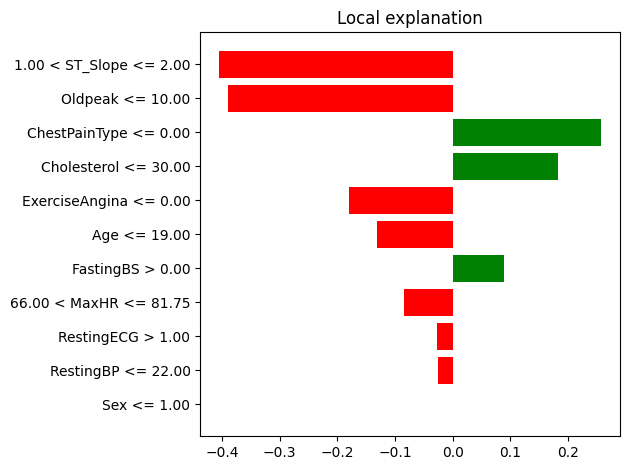

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer=LimeTabularExplainer(X_train.values,feature_names=X_train.columns.values.tolist(),class_names=['HeartDisease'],mode='regression')
exp=explainer.explain_instance(X_train.values[200],clf.predict,num_features=20)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



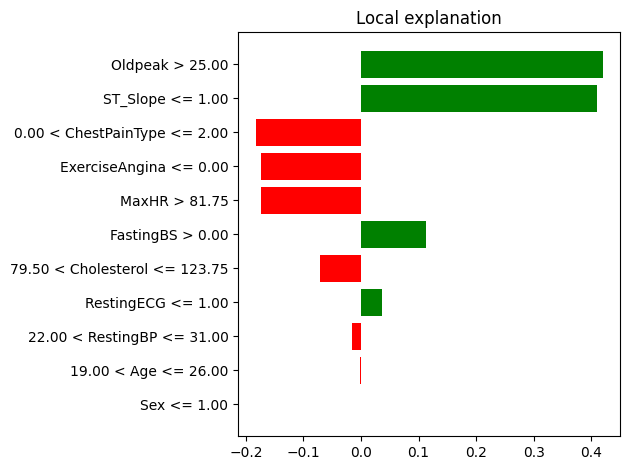

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
explainer=LimeTabularExplainer(X_train.values,feature_names=X_train.columns.values.tolist(),class_names=['HeartDisease'],mode='regression')
exp=explainer.explain_instance(X_train.values[250],clf.predict,num_features=20)
exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

**Shapley Additive Explanations(SHAP)**

In [ ]:
!pip install shapash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.8/651.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 57.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 73.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.4 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013920 sha256=75a223923268e65be242fb9a4b721576b351600cfb5009277024f850a01767de
  Stored in directory: /root/.cache/pip/wheels/6c/04/c8/22a0b5a26c3ecb61e17a27d4bbe7fad32d1417bbdbd4d46acf
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl si

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(max_depth=5,random_state=42,n_estimators=12)
rf_classifier.fit(X_train,y_train)
rf_y_pred=rf_classifier.predict(X_test)
rf_y_pred


array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
import pandas as pd
fi=pd.DataFrame({'Feature':X_train.columns,'Importance':rf_classifier.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

Feature  Importance
0         ST_Slope    0.319032
1      Cholesterol    0.130846
2          Oldpeak    0.121481
3    ChestPainType    0.116815
4            MaxHR    0.098683
5   ExerciseAngina    0.081404
6              Age    0.041622
7        RestingBP    0.033885
8              Sex    0.027165
9       RestingECG    0.015981
10       FastingBS    0.013085

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer
xp1=SmartExplainer(rf_classifier)
xp1.compile(x=X_test)
xp1.plot.features_importance()

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7cadde2b61d0>


In [ ]:
import random
subset=random.choices(X_test.index,k=50)
xp1.plot.features_importance(selection=subset)

In [ ]:
xp1.plot.local_plot(index=random.choice(X_test.index))

In [ ]:
xp1.plot.contribution_plot('ST_Slope')

In [ ]:
import shap
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
model.predict_proba(data_for_prediction_array)

array([[0.9969849 , 0.00301512]], dtype=float32)

In [ ]:
import shap
explainer = shap.Explainer(meta_learner)
shap_values = explainer(X)
shap_values

.values =
array([[[-0.00563786,  0.00563786],
        [-0.09441078,  0.09441078],
        [-0.16885566,  0.16885566],
        [-0.07616529,  0.07616529]],

       [[-0.00563786,  0.00563786],
        [-0.09441078,  0.09441078],
        [-0.16885566,  0.16885566],
        [-0.07616529,  0.07616529]],

       [[-0.00563786,  0.00563786],
        [-0.09441078,  0.09441078],
        [-0.16885566,  0.16885566],
        [-0.07616529,  0.07616529]],

       ...,

       [[-0.03556401,  0.03556401],
        [ 0.10911869, -0.10911869],
        [-0.22158349,  0.22158349],
        [-0.09364554,  0.09364554]],

       [[-0.00563786,  0.00563786],
        [-0.09441078,  0.09441078],
        [-0.16885566,  0.16885566],
        [-0.07616529,  0.07616529]],

       [[ 0.03816369, -0.03816369],
        [ 0.07705585, -0.07705585],
        [ 0.3864894 , -0.3864894 ],
        [ 0.00590293, -0.00590293]]])

.base_values =
array([[0.39094203, 0.60905797],
       [0.39094203, 0.60905797],
       [0.39094203,

In [ ]:
import pandas as pd

In [ ]:
X_df = pd.DataFrame(X)

In [ ]:
fi=pd.DataFrame({'Feature': X_df.columns, 'Importance': meta_learner.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

Feature  Importance
0        2    0.730234
1        1    0.197241
2        3    0.038623
3        0    0.033902

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(meta_learner)
xpl.compile(x=X_df)
xpl.plot.features_importance()

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7caddd7e6fb0>


**HYPER PARAMETER TUNNING TECHNIQUE**

1.   RANDOMSEARCHCV
2.   GRIDSEARCHCV



In [ ]:
model=RandomForestClassifier(n_estimators=400,criterion='entropy',max_features='sqrt',min_samples_leaf=25,random_state=100)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,predictions))
print('Accuracy:',accuracy_score(y_test,predictions))
print('Precision:',precision_score(y_test,predictions))
print('Recall:',recall_score(y_test,predictions))
print('f1_score:',f1_score(y_test,predictions))

[[ 96  13]
 [ 17 150]]
Accuracy: 0.8913043478260869
Precision: 0.9202453987730062
Recall: 0.8982035928143712
f1_score: 0.9090909090909091


**RANDOMSEARCHCV**

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=1000,num=10)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy:',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 95  14]
 [ 18 149]]
Accuracy: 0.8840579710144928
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.91      0.89      0.90       167

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276



In [ ]:
rf_randomcv.best_params_

{'n_estimators': 644,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'entropy'}

**GRIDSEARCHCV**

In [ ]:

from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], rf_randomcv.best_params_['min_samples_leaf'] + 2, rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2, rf_randomcv.best_params_['min_samples_split'] + 3, rf_randomcv.best_params_['min_samples_split']+5, rf_randomcv.best_params_['min_samples_split'] + 7, rf_randomcv.best_params_['min_samples_split'] + 9],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100, rf_randomcv.best_params_['n_estimators'] , rf_randomcv.best_params_['n_estimators']+100, rf_randomcv.best_params_['n_estimators'] + 200, rf_randomcv.best_params_['n_estimators'] + 300]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [890], 'max_features': ['log2'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [12, 13, 15, 17, 19], 'n_estimators': [544, 644, 744, 844, 944]}


In [ ]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,verbose=2,n_jobs=-1,error_score='raise')
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [890],
                         'max_features': ['log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [12, 13, 15, 17, 19],
                         'n_estimators': [544, 644, 744, 844, 944]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=890, max_features='log2',
                       min_samples_leaf=4, min_samples_split=15,
                       n_estimators=744)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 95  14]
 [ 19 148]]
0.8804347826086957
